[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ksasi/EVA/blob/master/Project13/Assignment13.ipynb)
      

In [0]:
# Import numpy, time, matplotlib, Keras models, backend, layers and utils
# set random seed using random.seed from numpy

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import Callback
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Concatenate, Add
from keras.regularizers import l2
from keras.initializers import he_normal

Using TensorFlow backend.


In [0]:
# Import cifar10 from keras datasets
# Load CIFAR10 dataset from Keras datasets module seperately as train and test datasets
# Obtain number of training and testing examples, image dimensions and number of classes

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


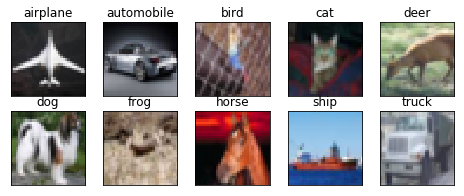

In [0]:
# Display images corresponding to each class from training dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Define function to plot summarize history for accuracy and loss

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Define function to calculate accuracy

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Image Normalization using values of: (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)

In [0]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset, this is irrelevant as we are manually using different values of mean and standard deviations for CIFAR10 dataset
datagen.fit(trainX)

# Manually set the mean and standard deviation for datagen as below. These are mean and std obtained by calculating "mean of the std/mean for the channel per image"
datagen.mean = np.array([0.4914, 0.4822, 0.4465], dtype=np.float32).reshape((1,1,3))
datagen.std = np.array([0.2023, 0.1994, 0.2010], dtype=np.float32).reshape((1,1,3))


# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 604.6387 321.22253
(50000, 32, 32, 3) 598.4765 319.27414


In [0]:
print(trainX.shape)

(50000, 32, 32, 3)


In [0]:
# Use Normalization values of: (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
# Calculation of above values as "mean of the std for the channel per image"

std = 0
for i in range(trainX.shape[0]):
  std = std + np.std(trainX[i,:,:,0]/255)

print(std)
print(std/50000)

10110.10585027962
0.2022021170055924


In [0]:
print(datagen.std)
print(datagen.mean)

[[[0.2023 0.1994 0.201 ]]]
[[[0.4914 0.4822 0.4465]]]


In [0]:
# Obtain train and test dataset after applying image standardization

iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy
                        

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### With Cutout / Random Erasing

- https://github.com/yu4u/cutout-random-erasing

In [0]:
# Import Cutout / Random Erasing implementation, especially for ImageDataGenerator in Keras from Github (https://github.com/yu4u/cutout-random-erasing)

!git clone https://github.com/ksasi/cutout-random-erasing ./random_eraser                                                   

import sys
sys.path.append("/content/random_eraser/")

Cloning into './random_eraser'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


### Random Crop

In [0]:
# Use albumentations to perform data augmentations i.e. increase image size to 40x40 and perform random crop to 32x32. Perform Horizontal and Vertical flip with probability of 0.5
# https://albumentations.readthedocs.io

#!pip install albumentations
import cv2


from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    RandomCrop,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma
)

AUGMENTATIONS_TRAIN = Compose([              
              PadIfNeeded(p=1, min_height=40, min_width=40, border_mode = cv2.BORDER_REFLECT),
              RandomCrop(32, 32),
              HorizontalFlip(p=0.5),
              VerticalFlip(p=0.5)
              ])


In [0]:
# Buld CIFAR10Sequence so that this can be passed in fit_generator for augmentations. The below class handles all augmentations and random eraser/cutout

from keras.utils import Sequence

class CIFAR10Sequence(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentations, pre_process):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augment = augmentations
        self.preprocess = pre_process

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return np.stack([self.preprocess(self.augment(image=x)["image"]) for x in batch_x], axis=0), np.array(batch_y)

## Define ResNet18 model

In [0]:
# Resnet Block
def add_resblock(input, num_filter = 12, dropout_rate = 0.2, l = 2, dim_reduce = False, dilation_rate=(1, 1), wd = 1e-4):
    temp = input
    for i in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        if dim_reduce == True and i == 0:
          Conv2D_3_3 = Conv2D(num_filter, (3,3), strides=(2, 2), use_bias=False ,padding='same', dilation_rate=(1, 1), kernel_initializer='he_normal', kernel_regularizer=l2(wd))(relu)
        else:
          Conv2D_3_3 = Conv2D(num_filter, (3,3), use_bias=False ,padding='same', dilation_rate=(1, 1), kernel_initializer='he_normal', kernel_regularizer=l2(wd))(relu)
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        temp = Conv2D_3_3
        
    if dim_reduce == False:
      Conv2D_1_1 = Conv2D(num_filter, (1,1), strides=(1, 1), use_bias=False ,padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(wd))(input)
      concat = Concatenate(axis=-1)([input,temp])
      add = Add()([Conv2D_1_1,temp])
    else:
      Conv2D_1_1 = Conv2D(num_filter, (1,1), strides=(2, 2), use_bias=False ,padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(wd))(input)
      concat = Concatenate(axis=-1)([Conv2D_1_1,temp])
      add = Add()([Conv2D_1_1,temp])
      
    #return concat
    return add

In [0]:
def output_layer(input):
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    #AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    #flat = Flatten()(AvgPooling)
    flat = GlobalAveragePooling2D()(relu)
    output = Dense(num_classes, activation='softmax')(flat)
    
    return output

In [0]:
# Define ResNet18 model
# Removed the strided from 7x7 convolution. So 7x7 convolutions are with stride 1. The thinking is there is already a MaxPool after 7x7 convolution , hence we don't need to start with Stride 2 convolution.
# Stride 2 is removed from the last Resnet block (4th block). Stride 2 can result in loss of information. We want to preserve as much information as possible before Softmax/GAP.

from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
num_classes = 10
channel = 3

input = Input(shape=(32, 32, channel,))
First_Conv2D = Conv2D(64, (7,7), strides=(1, 1), use_bias=False ,padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(1e-4))(input)
BatchNorm = BatchNormalization()(First_Conv2D)
relu = Activation('relu')(BatchNorm)
MaxPool = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(relu)

r18_layers = [2, 2, 2, 2]

Block = MaxPool
for n,k in enumerate(r18_layers):
  if n in [0, 3]:
    for j in range(k):
      Block = add_resblock(Block, num_filter = 64*(2**n), dropout_rate = 0.1, l = 2, dim_reduce = False, dilation_rate=(1, 1), wd = 1e-4)
  else:
    for j in range(k):
      if j in [0]:
        Block = add_resblock(Block, num_filter = 64*(2**n), dropout_rate = 0.1, l = 2, dim_reduce = True, dilation_rate=(1, 1), wd = 1e-4)
      else:
        Block = add_resblock(Block, num_filter = 64*(2**n), dropout_rate = 0.1, l = 2, dim_reduce = False, dilation_rate=(1, 1), wd = 1e-4)
        
output = output_layer(Block)

In [0]:
# Build model and display model summary

model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 32, 32, 64)   9408        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_55 (BatchNo (None, 32, 32, 64)   256         conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_55 (Activation)      (None, 32, 32, 64)   0           batch_normalization_55[0][0]     
__________________________________________________________________________________________________
max_poolin

In [0]:
sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [0]:
# LR Finder class

class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [0]:
# Create LR finder instance to find the optimum learning rate

lr_finder = LR_Finder(start_lr=1e-5, end_lr=100, step_size=np.ceil(X_train.shape[0]/(128)))

In [0]:
from random_eraser import get_random_eraser

# Use pixel_level = True in random_eraser as below

eraser = get_random_eraser(v_l=0, v_h=1, pixel_level=True) 

train_gen = CIFAR10Sequence(X_train, Y_train, batch_size = 128, augmentations = AUGMENTATIONS_TRAIN, pre_process = eraser)

# Ensure that number of epochs = 1 when calling fit()
model.fit_generator(train_gen,samples_per_epoch = X_train.shape[0], nb_epoch = 1, validation_data = (X_test, Y_test), verbose=1, callbacks=[lr_finder] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<__main__...., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=1)`
  
W0803 13:36:39.743660 140461181249408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a fut

Epoch 1/1
390/390 [==============================] - 37s 95ms/step - loss: 4.7540 - acc: 0.1656 - val_loss: 14.5142 - val_acc: 0.1000


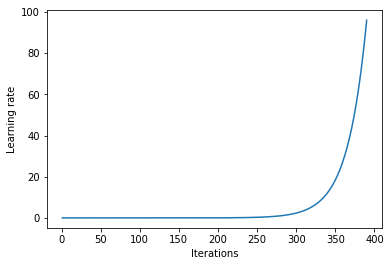

In [0]:
lr_finder.plot_lr()

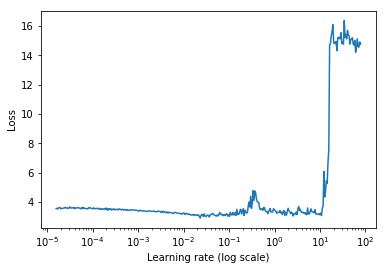

In [0]:
lr_finder.plot()

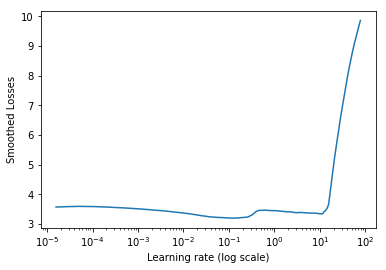

In [0]:
lr_finder.plot_smoothed_loss()

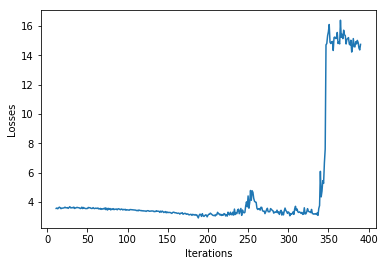

In [0]:
lr_finder.plot_loss()

### Finding a good learning rate & training with OneCycleLR

In [0]:
# Import One-Cycle Learning rate policy (Keras) (https://github.com/prateekgulati/keras-one-cycle)

!git clone https://github.com/prateekgulati/keras-one-cycle ./clr
  
import sys
sys.path.append("/content/clr/")

Cloning into './clr'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 211 (delta 0), reused 1 (delta 0), pack-reused 208
Receiving objects: 100% (211/211), 3.19 MiB | 1.51 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [0]:
# Finding good learning rate using LRFinder (https://github.com/prateekgulati/keras-one-cycle/blob/master/README.md). Re-run the blocks where we create the resnet18 model. This ensure that the model is not trained and re-initialized model is used below One-Cycle code is executed.

from clr import LRFinder

'''lr_callback = LRFinder(num_samples = X_train.shape[0] , batch_size = 128, minimum_lr = 1e-5, maximum_lr = 100, validation_data = (X_test, Y_test), 
                       lr_scale='exp', validation_sample_rate=5,
                       save_dir='/content/lr')'''


lr_callback = LRFinder(num_samples = X_train.shape[0] , batch_size = 128, minimum_lr = 1e-5, maximum_lr = 100, validation_data = (X_test, Y_test), lr_scale='exp', save_dir='/content/lr')

train_gen = CIFAR10Sequence(X_train, Y_train, batch_size = 128, augmentations=AUGMENTATIONS_TRAIN, pre_process = eraser )

# Ensure that number of epochs = 1 when calling fit()
model.fit_generator(train_gen,samples_per_epoch = X_train.shape[0], nb_epoch = 1, verbose=1, callbacks=[lr_callback] )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<__main__...., verbose=1, callbacks=[<clr.LRFi..., steps_per_epoch=390, epochs=1)`
  


Epoch 1/1
389/390 [============================>.] - ETA: 0s - loss: 3.2846 - acc: 0.2057 - LRFinder: val_loss: 5.8822 - lr = 3.10676021 
 - LRFinder: val_loss: 5.3651 - lr = 3.23784802 
390/390 [==============================] - 68s 175ms/step - loss: 3.2835 - acc: 0.2057
	LR Finder : Saved the losses and learning rate values in path : {/content/lr}


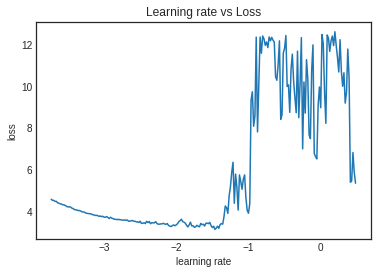

In [0]:
#lr_callback.plot_schedule(clip_beginning=30)

lr_callback.plot_schedule(clip_beginning=70)

### Inferred learning rate value from above plot 

#### learning rate value from X-axis is after -2  (The values are in log 10 scale (since exp was used for lr_scale))

#### Actual learning maximum learning rate is 10 ^ (x) which is 3*10^(-2) i.e.  ~ 3e-2

#### Use  3e-2

In [0]:
# Re-initialize the model for training with the above learning rate. Re-run the blocks where we create the resnet18 model. This ensure that the model is not trained when LRFinder/One-Cycle code is executed.

model_f = model

sgd = optimizers.SGD(lr= 3e-2, momentum=0.9, nesterov=False)
model_f.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

### Training with OneCycleLR aka  "SUPER CONVERGENCE"

In [0]:
# Define OneCycleLR

from clr import OneCycleLR

lr_manager = OneCycleLR(samples = X_train.shape[0], epochs = 300, max_lr = 3e-2, verbose=True, batch_size = 128, end_percentage=0.1, scale_percentage=None,
                        maximum_momentum=0.9, minimum_momentum=0.9)

In [0]:
# Mount google drive into colab. This is to save snapshots of the model during training

from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [0]:
# Path to save the snapshots of the model

filepath="/content/gdrive/My Drive/Best_model_resnet18_f.hdf5"

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [0]:
# Early stopping created to monitor validation accuracy and stop training once validation accuracy reaches 90%

class EarlyStoppingByValAcc(Callback):
  def __init__(self, monitor='val_acc', value=0.85, verbose=0):
    super(Callback, self).__init__()
    self.monitor = monitor
    self.value = value
    self.verbose = verbose
    self.epoch_threshold = 1000
               
  def on_epoch_end(self, epoch, logs={}):
    current = logs.get(self.monitor)
    if current is None:
      warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)
    if current > self.value and epoch < self.epoch_threshold:
      if self.verbose > 0:
        print("Epoch %05d: early stopping THR" % epoch)
      self.model.stop_training = True
      
es = EarlyStoppingByValAcc(monitor='val_acc', value=0.90, verbose = 1)

In [0]:
# callback list for OneCycleLR, perform early stopping and saving the model when accuracy improves

callbacks_list = [lr_manager, es, checkpoint]

In [68]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display best validatino accuracy.
# Training with OneCycleLR

from keras.preprocessing.image import ImageDataGenerator


train_gen = CIFAR10Sequence(X_train, Y_train, batch_size = 128, augmentations=AUGMENTATIONS_TRAIN, pre_process = eraser)

# train the model
start = time.time()

# Train the model

model_info = model_f.fit_generator(train_gen, samples_per_epoch = X_train.shape[0], nb_epoch = 300, validation_data = (X_test, Y_test), verbose=1, workers=2, use_multiprocessing=True, callbacks=callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

print ("Top accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<__main__...., validation_data=(array([[[..., verbose=1, workers=2, use_multiprocessing=True, callbacks=[<clr.OneC..., steps_per_epoch=390, epochs=300)`
  if sys.path[0] == '':


Epoch 1/300
  4/390 [..............................] - ETA: 6:12 - loss: 3.6620 - acc: 0.1113

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.270334). Check your callbacks.
  % delta_t_median)


390/390 [==============================] - 35s 90ms/step - loss: 3.0555 - acc: 0.3001 - val_loss: 2.8918 - val_acc: 0.3505
 - lr: 0.00320 - momentum: 0.90 

Epoch 00001: val_acc improved from -inf to 0.35050, saving model to /content/gdrive/My Drive/Best_model_resnet18_f.hdf5
Epoch 2/300
390/390 [==============================] - 31s 81ms/step - loss: 2.8101 - acc: 0.3874 - val_loss: 2.8806 - val_acc: 0.3793
 - lr: 0.00340 - momentum: 0.90 

Epoch 00002: val_acc improved from 0.35050 to 0.37930, saving model to /content/gdrive/My Drive/Best_model_resnet18_f.hdf5
Epoch 3/300
390/390 [==============================] - 31s 80ms/step - loss: 2.6907 - acc: 0.4365 - val_loss: 2.7940 - val_acc: 0.4140
 - lr: 0.00360 - momentum: 0.90 

Epoch 00003: val_acc improved from 0.37930 to 0.41400, saving model to /content/gdrive/My Drive/Best_model_resnet18_f.hdf5
Epoch 4/300
390/390 [==============================] - 31s 80ms/step - loss: 2.6010 - acc: 0.4705 - val_loss: 2.8258 - val_acc: 0.4105
 - l

In [69]:
# Load the saved model to obtain the accuracy on the test dataset of CIFAR-10

from keras.models import load_model
saved_model = load_model('/content/gdrive/My Drive/Best_model_resnet18_f.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:251: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if weight_names:


In [70]:
# Accuracy on test dataset of CIFAR-10

print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, saved_model))

Accuracy on test data is: 90.36


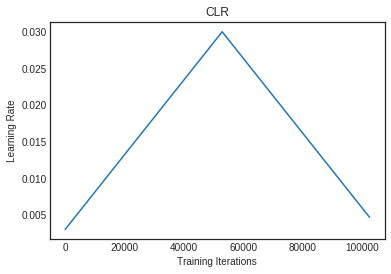

In [71]:
# Plot of Learning Rate Vs Training Iterations

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR")
plt.plot(lr_manager.history['lr'])
plt.show()

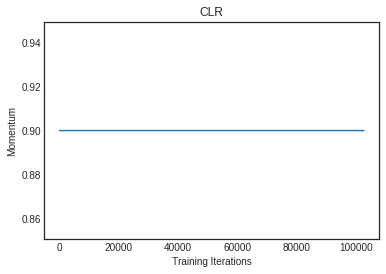

In [72]:
# Plot of momentum Vs Training Iterations

plt.xlabel('Training Iterations')
plt.ylabel('Momentum')
plt.title("CLR")
plt.plot(lr_manager.history['momentum'])
plt.show()

### **References & Attributions:**

*   Keras (https://keras.io/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*